In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
merge_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

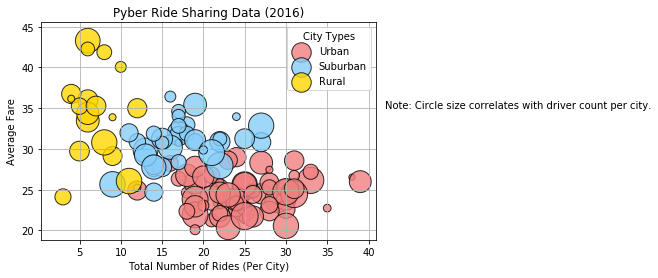

In [24]:
# Obtain the x and y coordinates for each of the three city types
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(True)

# Build the scatter plots for each city types
urban = merge_df[merge_df["type"]=="Urban"]
suburban = merge_df[merge_df["type"]=="Suburban"]
rural = merge_df[merge_df["type"]=="Rural"]

urban_fare_avg = urban.groupby(["city"]).mean()["fare"]
urban_ride_count = urban.groupby(["city"]).count()["ride_id"]
urban_driver_count = urban.groupby(["city"]).mean()["driver_count"]

sub_fare_avg = suburban.groupby(["city"]).mean()["fare"]
sub_ride_count = suburban.groupby(["city"]).count()["ride_id"]
sub_driver_count = suburban.groupby(["city"]).mean()["driver_count"]

rural_fare_avg = rural.groupby(["city"]).mean()["fare"]
rural_ride_count = rural.groupby(["city"]).count()["ride_id"]
rural_driver_count = rural.groupby(["city"]).mean()["driver_count"]


plt.scatter(urban_ride_count, 
            urban_fare_avg, 
            s=10*urban_driver_count,
            color = "lightcoral", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.scatter(sub_ride_count, 
            sub_fare_avg, 
            s=10*urban_driver_count,
            color = "lightskyblue", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_fare_avg, 
            s=10*urban_driver_count,
            color = "gold", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Rural")
# Incorporate the other graph properties

# Create a legend
plt.legend(loc= "upper right", title="City Types")

# Incorporate a text label regarding circle size
plt.text(42, 35,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.show()

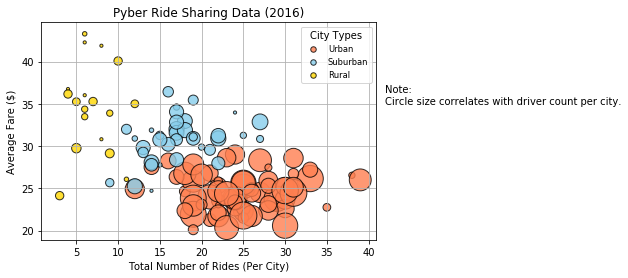

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

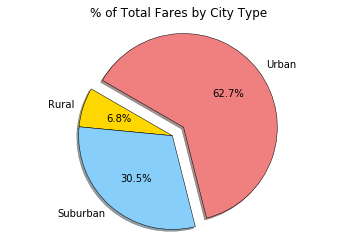

In [33]:
# Calculate Type Percents
by_type = merge_df.groupby("type")["type", "fare", "ride_id", "driver_count"]

total_fares = by_type.sum()["fare"]

# Build Pie Chart
colors = ["Gold", "LightSkyblue", "Lightcoral"]
explode = [0 , 0, 0.15]
labels = fare_sum.index
plt.pie(fare_sum, startangle = 150, 
        colors = colors, 
        explode = explode, 
        labels = labels, 
        autopct = "%1.1f%%", 
        shadow = True, 
        wedgeprops = {'linewidth': 0.5, "edgecolor": "black"})

plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

# Save Figure


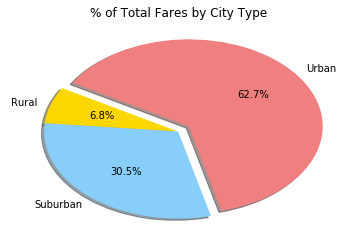

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

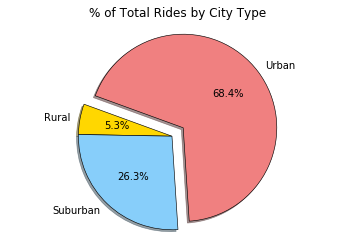

In [38]:
# Calculate Ride Percents
ride_sum = by_type.count()["ride_id"]

# Build Pie Chart
labels = ride_sum.index
plt.pie(ride_sum, startangle = 160, labels = labels, colors = colors, explode = explode, autopct = "%1.1f%%", shadow = True, wedgeprops = {"linewidth":0.6, "edgecolor": "black"})
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

# Save Figure


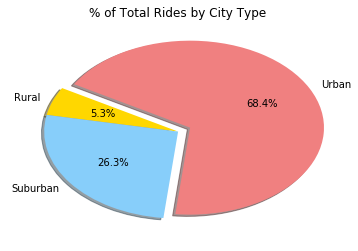

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

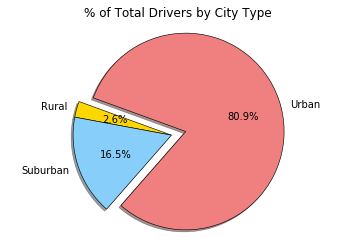

In [39]:
# Calculate Driver Percents
driver_sum = city_df.groupby("type").sum()["driver_count"]

# Build Pie Charts
labels = driver_sum.index
plt.pie(driver_sum, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {"linewidth": 0.6, "edgecolor": "Black"})
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()

# Save Figure


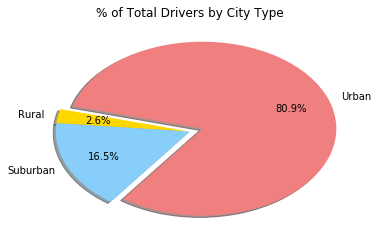

In [6]:
# Show Figure
plt.show()